In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Datasets/M3CustSeg.csv")

In [4]:
df.head()

,M3Company,Order_Number,Order_Line_Number,Customer,Requested_delivery_date,Confirmed_delivery_date,Days_betw_actual_planned_departure_date,Days_between_actual_and_required_del_dt,Days_between_actual_dely_dt_and_order_dt,Days_between_conf_and_required_dely_date,Delivery_Date
0,101,2012011574,2,CJ200,4/7/2020,4/7/2020,0,0,0,0,4/7/2020
1,101,2011014219,1,CJ110,4/7/2020,4/7/2020,999,999,0,999,4/7/2020
2,101,2012011649,1,AL115,5/11/2020,5/11/2020,0,0,0,0,5/10/2020
3,400,4003115442,1,49-2001,2/4/2020,2/4/2020,-8,-8,0,0,1/27/2020
4,400,4003115442,2,49-2001,2/4/2020,2/4/2020,-8,-8,0,0,1/27/2020


In [5]:
df['Requested_delivery_date'] = pd.to_datetime(df['Requested_delivery_date'])
df['Confirmed_delivery_date'] = pd.to_datetime(df['Confirmed_delivery_date'])
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'])
df.dtypes

M3Company                                            int64
Order_Number                                        object
Order_Line_Number                                    int64
Customer                                            object
Requested_delivery_date                     datetime64[ns]
Confirmed_delivery_date                     datetime64[ns]
Days_betw_actual_planned_departure_date              int64
Days_between_actual_and_required_del_dt              int64
Days_between_actual_dely_dt_and_order_dt             int64
Days_between_conf_and_required_dely_date             int64
Delivery_Date                               datetime64[ns]
dtype: object

In [6]:
df = df[['Customer','Requested_delivery_date','Confirmed_delivery_date']]

In [7]:
import seaborn as sns

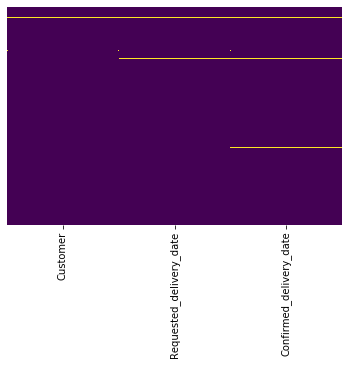

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### NOTE:
I only dropped records where only Customer or Requested Delivery Date were null and not where Requested delivery date, thinking that in that particular scenario company rejected that order leading to angry sentiment on customers side which would an important record. 

In [9]:
df = df[df['Customer'].notnull() & df['Requested_delivery_date'].notnull()]
df = df.reset_index()

In [10]:
df[df['Confirmed_delivery_date'].isnull()]

,index,Customer,Requested_delivery_date,Confirmed_delivery_date
14,18,26-GB0100,2020-04-20,NaT
34,38,26-GB0100,2020-04-20,NaT
84,91,26-GB0100,2020-04-21,NaT
100,110,I90000002,2020-04-16,NaT
206,217,I90000002,2020-04-17,NaT
...,...,...,...,...
7690,7803,26-GB0100,2020-05-04,NaT
9006,9123,26-GB0100,2020-05-04,NaT
9008,9125,26-GB0100,2020-04-28,NaT
9965,10088,26-GB0100,2020-04-21,NaT


In [11]:
df.head(5)

,index,Customer,Requested_delivery_date,Confirmed_delivery_date
0,0,CJ200,2020-04-07,2020-04-07
1,1,CJ110,2020-04-07,2020-04-07
2,2,AL115,2020-05-11,2020-05-11
3,3,49-2001,2020-02-04,2020-02-04
4,4,49-2001,2020-02-04,2020-02-04


In [24]:
df['days_gap'] = (df['Confirmed_delivery_date'] - df['Requested_delivery_date']).dt.days

In [13]:
df['days_gap'].unique()

array([ 0.000e+00, -6.000e+00,        nan, -3.000e+00, -1.000e+00,
       -2.200e+01,  6.000e+00, -2.800e+01, -2.000e+00, -2.700e+01,
       -4.000e+00, -4.700e+01,  1.000e+00, -2.100e+01, -7.000e+00,
       -9.000e+00, -2.900e+01, -2.300e+01, -1.100e+01,  1.500e+01,
        9.000e+00, -7.400e+01, -8.000e+00, -1.700e+01, -5.000e+00,
       -4.100e+01, -5.900e+01, -1.200e+01,  2.000e+00, -4.300e+01,
       -3.700e+01,  4.000e+00, -1.730e+02, -1.000e+01, -1.050e+02,
       -7.500e+01,  2.300e+01,  3.000e+00, -1.600e+01, -6.200e+01,
       -1.400e+01, -1.900e+01, -1.410e+02, -2.670e+02,  8.000e+00,
        5.000e+00,  1.400e+01, -1.670e+02,  2.390e+02, -6.700e+01,
       -2.360e+02, -1.300e+01,  1.300e+01, -5.300e+01, -2.330e+02,
       -6.910e+02, -1.160e+02, -6.920e+02, -1.430e+02, -6.900e+01,
       -2.000e+01, -1.700e+02, -3.500e+01, -1.500e+01, -5.800e+01,
       -1.800e+02, -2.150e+02, -4.000e+01, -3.900e+01, -3.650e+02,
        4.200e+01, -6.400e+01,  1.900e+01, -9.100e+01,  4.300e

#### NOTE:
Filled the day gaps values when Delivery date was not confirmed.
Value filled here is twice the maximum day gap present in the whole data.

In [14]:
df['days_gap'].fillna(value = 2*(df.iloc[:,4].max()), inplace = True)

In [15]:
df['days_gap'].unique()

array([ 0.000e+00, -6.000e+00,  4.780e+02, -3.000e+00, -1.000e+00,
       -2.200e+01,  6.000e+00, -2.800e+01, -2.000e+00, -2.700e+01,
       -4.000e+00, -4.700e+01,  1.000e+00, -2.100e+01, -7.000e+00,
       -9.000e+00, -2.900e+01, -2.300e+01, -1.100e+01,  1.500e+01,
        9.000e+00, -7.400e+01, -8.000e+00, -1.700e+01, -5.000e+00,
       -4.100e+01, -5.900e+01, -1.200e+01,  2.000e+00, -4.300e+01,
       -3.700e+01,  4.000e+00, -1.730e+02, -1.000e+01, -1.050e+02,
       -7.500e+01,  2.300e+01,  3.000e+00, -1.600e+01, -6.200e+01,
       -1.400e+01, -1.900e+01, -1.410e+02, -2.670e+02,  8.000e+00,
        5.000e+00,  1.400e+01, -1.670e+02,  2.390e+02, -6.700e+01,
       -2.360e+02, -1.300e+01,  1.300e+01, -5.300e+01, -2.330e+02,
       -6.910e+02, -1.160e+02, -6.920e+02, -1.430e+02, -6.900e+01,
       -2.000e+01, -1.700e+02, -3.500e+01, -1.500e+01, -5.800e+01,
       -1.800e+02, -2.150e+02, -4.000e+01, -3.900e+01, -3.650e+02,
        4.200e+01, -6.400e+01,  1.900e+01, -9.100e+01,  4.300e

In [16]:
days = df['Requested_delivery_date'].dt.day.unique()
days.sort()
# print(days)
for i in range(0, df.shape[0]):
    if(df['Requested_delivery_date'].dt.day[i] <= days[10]):
        df.set_value(i, 'days_gap', df['days_gap'][i]*0.25)
    elif((df['Requested_delivery_date'].dt.day[i] > days[10]) & (df['Requested_delivery_date'].dt.day[i] <= days[20])):
        df.set_value(i, 'days_gap', df['days_gap'][i]*0.5)
    else:
        df.set_value(i, 'days_gap', df['days_gap'][i]*1.0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [22]:
df

,Customer,Requested_delivery_date,Confirmed_delivery_date,days_gap
0,CJ200,2020-04-07,2020-04-07,0.0
1,CJ110,2020-04-07,2020-04-07,0.0
2,AL115,2020-05-11,2020-05-11,0.0
3,49-2001,2020-02-04,2020-02-04,0.0
4,49-2001,2020-02-04,2020-02-04,0.0
...,...,...,...,...
10865,26-37456,2019-03-19,2019-03-21,-1.0
10866,26-37456,2019-03-26,2019-03-27,-1.0
10867,43400020,2019-03-28,2019-05-29,-62.0
10868,26-8001,2019-08-16,2019-08-21,-2.5


In [28]:
print(max(df['days_gap']), min(df['days_gap']))

4735.0 -239.0


In [32]:
df['Customer'].nunique()

241

### Customer Segmentation based on own logic

In [26]:
s=0
dicto = {'h':0,'n':1,'a':2}
customer_mood = pd.DataFrame(columns=['Customer', 'prob_h', 'prob_n', 'prob_a', 'label'])
for name,group in df.groupby('Customer'):
    customer_mood.set_value(s,'Customer', name)
#     customer_mood['Customer'] = name
    h = len(group[group['days_gap']<=0]) 
#     n = len(group[group['days_gap']>0 | group['days_gap']<=30])
    a = len(group[group['days_gap']>30])
    t = len(group['days_gap'])
    a += len(group[np.isnan(group['days_gap'])])
    n = t-a-h
    var = {h:'h',a:'a',n:'n'}
    customer_mood.set_value(s,'prob_h', h/t)
    customer_mood.set_value(s,'prob_n', n/t)
    customer_mood.set_value(s,'prob_a', a/t)
#     customer_mood.iloc[s,3] = n/t
#     customer_mood.iloc[s,4] = a/t
    customer_mood.set_value(s,'label', dicto[var.get(max(var))])
    s = s + 1
    
customer_mood


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release

,Customer,prob_h,prob_n,prob_a,label
0,1,0,1,0,1
1,103985,0.964029,0.0143885,0.0215827,0
2,26-0001,0.94382,0.0561798,0,0
3,26-0101,0.989041,0.0109589,0,0
4,26-0102,1,0,0,0
...,...,...,...,...,...
236,Y99UK1,0.591837,0.387755,0.0204082,0
237,Y99UK2,0.251572,0.578616,0.169811,1
238,YINT901,0.280702,0.719298,0,1
239,YINTSE1,0.192308,0.807692,0,1


In [27]:
customer_mood['label'].value_counts()

0    173
1     66
2      2
Name: label, dtype: int64

### Customer Segmentation based on Agglomerative Clustering

In [75]:
X = customer_mood.drop(['label','Customer'], axis=1)

In [76]:
from sklearn.cluster import AgglomerativeClustering

In [77]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
new_labels = cluster.fit_predict(X)

In [78]:
np.unique(new_labels, return_counts=True)

(array([0, 1, 2], dtype=int64), array([ 10, 228,   3], dtype=int64))

In [79]:
customer_mood = customer_mood.join(pd.DataFrame(data=new_labels, columns=['new_labels']))

In [80]:
customer_mood.head()

,Customer,prob_h,prob_n,prob_a,label,new_labels
0,1,1,0,0,0,1
1,103985,1,0,0,0,1
2,26-0001,1,0,0,0,1
3,26-0101,1,0,0,0,1
4,26-0102,1,0,0,0,1


In [81]:
customer_mood['new_labels'].value_counts()

1    228
0     10
2      3
Name: new_labels, dtype: int64

In [82]:
customer_mood['label'].value_counts()

0    233
1      5
2      3
Name: label, dtype: int64

In [90]:
df.iloc[customer_mood[customer_mood['new_labels'] == 0]['Customer'].index, :]

,index,Customer,Requested_delivery_date,Confirmed_delivery_date,days_gap
23,27,43NE01000,2020-03-03,2020-03-04,-0.25
29,33,103985,2020-03-19,2020-03-19,0.00
122,132,26-1310,2020-04-30,2020-05-02,-2.00
151,161,CJ200,2020-03-18,2020-03-18,0.00
180,191,26-4002,2019-03-27,2019-03-27,0.00
228,240,88010,2020-02-18,2020-02-27,-4.50
234,246,26-37466,2018-11-30,2018-11-29,1.00
235,247,26-37466,2018-12-14,2018-11-29,7.50
237,249,43NE01000,2020-01-16,2020-01-16,0.00
238,250,PRECISION,2020-05-31,2020-05-31,0.00


In [91]:
df.iloc[customer_mood[customer_mood['new_labels'] == 1]['Customer'].index, :]

,index,Customer,Requested_delivery_date,Confirmed_delivery_date,days_gap
0,0,CJ200,2020-04-07,2020-04-07,0.00
1,1,CJ110,2020-04-07,2020-04-07,0.00
2,2,AL115,2020-05-11,2020-05-11,0.00
3,3,49-2001,2020-02-04,2020-02-04,0.00
4,4,49-2001,2020-02-04,2020-02-04,0.00
...,...,...,...,...,...
232,244,26-4003,2020-01-22,2020-01-24,-2.00
233,245,26-1310,2020-04-28,2020-05-01,-3.00
236,248,26-37466,2018-12-14,2018-12-05,4.50
239,251,49-2001,2020-01-30,2020-01-30,0.00


In [92]:
df.iloc[customer_mood[customer_mood['new_labels'] == 2]['Customer'].index, :]

,index,Customer,Requested_delivery_date,Confirmed_delivery_date,days_gap
47,54,103985,2020-03-17,2020-03-17,0.0
86,96,43CA10010,2020-03-17,2020-03-17,0.0
172,183,75-WD001,2020-04-22,2020-04-23,-1.0


### Customer sentiment per Order

In [83]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
new_labels2 = cluster.fit_predict(df['days_gap'].values.reshape(-1,1))

In [84]:
np.unique(new_labels2, return_counts=True)

(array([0, 1, 2], dtype=int64), array([10795,     4,    71], dtype=int64))